# TNS2 - HW3 : processus al√©atoires

## Stationnarit√© et Ergodisme (rappels)



### Stationnarit√© au sens large

Soit un processus al√©atoire $X(t)$.  Pour chaque temps $t_i$, $X(t_i)$ est une variable al√©atoire.

Un processus est dit stationnaire au sens large si :
<ul>
<li> sa moyenne est constante : $m_X[n] = \mbox{E}[X[n]] = m_X$ ;
<li> son autocorr√©lation ne d√©pend que de $\tau = l-k$ : $\mbox{R}_X(l,k) = \mbox{E}[X[l] X[k]] = r_X(\tau), \tau = l-k$.
</ul>

### Ergodisme au sens large

*On dit qu'un processus al√©atoire est ergodique si les moyennes d'ensemble sont √©gales aux moyennes temporelles.*


Un processus est ergodique (au sens large) si :
<ul>
<li> Il est stationnaire (au sens large)
<li> $\displaystyle m_X = \mbox{E}[X[n]] = \lim_{N\rightarrow \infty} \frac{1}{2N+1}
  \sum_{n=-N}^{N} x[n] $ \vs \vs
<li> $\displaystyle r_X[l-k] = \mbox{E}[X[l]X[k]]= \lim_{N\rightarrow \infty} \frac{1}{2N+1}\sum_{n=-N}^{N} x[n]x[n-(l-k)]$

</ul>




### Notion de variables al√©atoires ind√©pendantes et identiquement distribu√©es (i.i.d.) et de processus blanc

Rappel : des variables al√©atoires $X$ et $Y$ sont ind√©pendantes et identiquement distribu√©es si
<ul>
<li> ... elles sont ind√©pendantes : $P_{XY}(x,y) = P_X(x).P_Y(y)$
<li> ... elles ont la m√™me distribution/masse de probabilit√© : $P_{X}(x) = P_Y(y)$
</ul>
Un processus blanc est alors d√©fini comme √©tant une suite de variables al√©atoires i.i.d., de moyenne nulle. 

Ce processus est dit blanc parce que sa densit√© spectrale de puissance est constante en fonction de la fr√©quence ("toutes les fr√©quences sont pr√©sentes √† la m√™me puissance"



### G√©n√©rer un bruit blanc

Ecrire une fonction qui re√ßoit, en entr√©e, la puissance du bruit blanc d√©sir√© et la longueur de la s√©quence (nombre de points).  Vous fabriquerez un bruit blanc "gaussien", c'est √† dire que chaque point de la s√©quence est une variable al√©atoire Gaussienne de variance $\sigma^2$ et de moyenne nulle.  Cherchez du c√¥t√© de *np.random.normal*




In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.io import wavfile

def bblanc(sigma2,N):
    # ici votre code
    your_bruit_blanc=np.random.normal(0,np.sqrt(sigma2),N)   #code pour le bruit blanc
    return your_bruit_blanc    

### Test de votre fonction

puissance du bruit =  0.978567489908798 



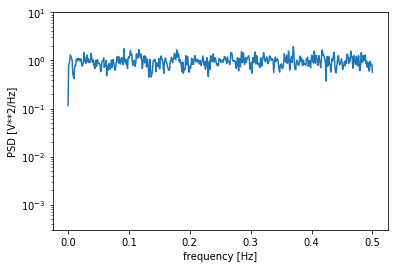

Moyenne de la densit√© spectrale de puissance :  0.970065730980358


In [2]:
# test1  : bruit blanc de taille N et de puissance Pdesire, v√©rifiez la puissance

Pdesire=1
N=10000
t1=bblanc(Pdesire,N)
p1=np.var(t1)
print('puissance du bruit = ',p1,'\n')

#test2 : le m√™me bruit blanc doit donner approximativement 
#       une constante en fonction de la fr√©quence

f, Pt1_den = signal.welch(t1/np.sqrt(2), fs=1, nperseg=1024)
      # note : la division par sqrt(2) est due √† un "d√©tail" : on "affiche"
      #        la densit√© spectrale de 0 √† 0.5 Hz, parce qu'on regarde uniquement
      #        la partie positive de l'axe des fr√©quences, ce qui m√®ne √† une DSP
      #        multipli√©e par 2 : on diviste par np.sqrt(2) pour compenser
plt.semilogy(f, Pt1_den)
plt.ylim([0.3e-3*Pdesire, Pdesire*10])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

print('Moyenne de la densit√© spectrale de puissance : ',np.mean(Pt1_den))



### Calcul de $m_X[n]$ et de $R_X[k,l]$

Vous vous int√©resserez √† deux processus al√©atoires diff√©rents, un processus *blanc* et un processus
*son*.

Pour le processus blanc, vous g√©n√©rerez un tableau de 100 r√©alisations de 20000 variables al√©atoires Gaussiennes de moyenne nulle et de variance 1. (chaque ligne du tableau repr√©sentera une r√©alisation d'un processus al√©atoire pour $n$ allant de 1 √† 20000, et le tableau comprendra 100 lignes).

Vous calculerez $m_X[n]$ et  $R_X[k,l]$ pour $k - l$ variant de -5 √† 5 et, par exemple, $k=100$.  Comme vous ne pouvez pas calculer strictement $\mbox{R}_X(l,k) = \mbox{E}[X[l] X[k]]$, vous remplacerez l'op√©rateur d'esp√©rance math√©matique par la moyenne arithm√©tique.  Ici, vous avez 100 r√©alisations, et donc, par exemple pour k=100 et l=105 :

$$ \mbox{E}[X[l] X[k]] \simeq \displaystyle \frac{1}{100} \sum_{i=1}^{100}x_i[l] x_i[k]$$

o√π $x_i[n]$ est l'√©chantillon $n$ de la r√©alisation num√©ro $i$ de $X$.


V√©rifiez la stationnarit√© ! (par exemple en faisant un ``plot'' de la moyenne et de l'autocorr√©lation pour diff√©rentes valeurs de $\tau$.\\

Au passage, pour une valeur de $k$ fix√©e (par exemple $k = 100$), faites une figure de la corr√©lation en fonction de $\tau$. \\

Pour le processus son, vous allez charger le fichier ``son.wav'' depuis la page du cours,
chargez la dans le notebook.  Rognez la longueur √† 20000 x 100 et fabriquez
en un tableau de 100 lignes et 20000 colonnes?



Vous calculerez $m_X[n]$ et  $R_X[k,l]$ pour $k - l$ variant de -5 √† 5

V√©rifiez la stationnarit√© !



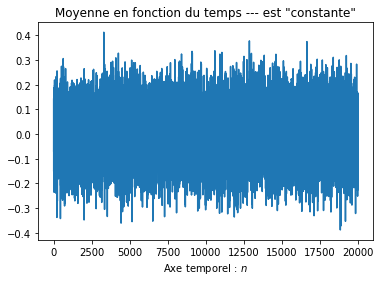

<Figure size 432x288 with 0 Axes>

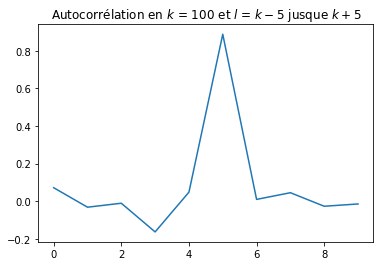

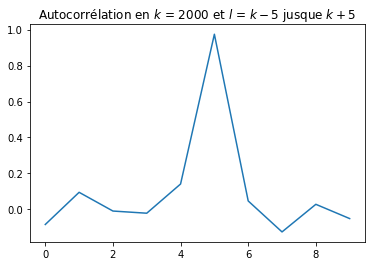

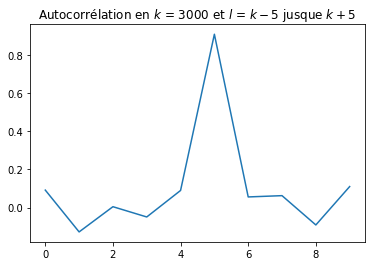

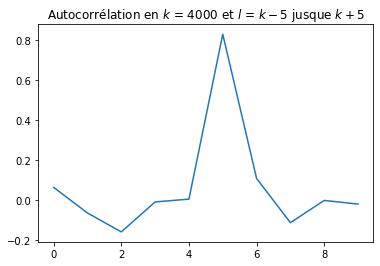

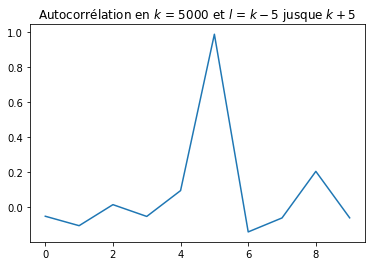

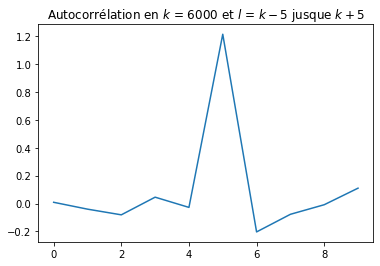

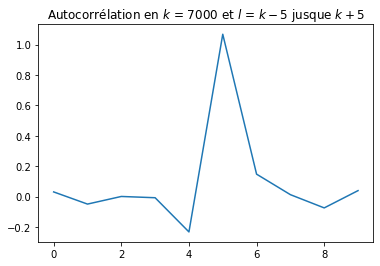

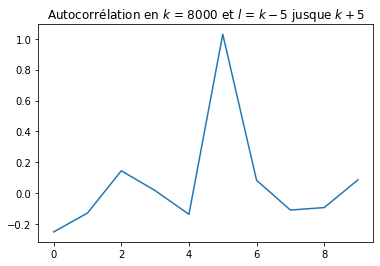

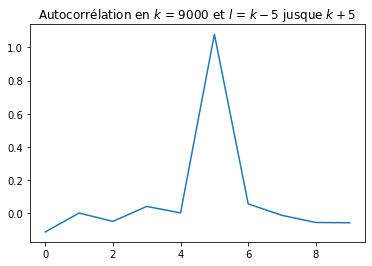

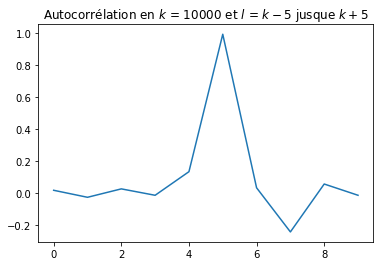

On constate que la fonction d'autocorr√©lation est la m√™me, quel que soit k (et donc ne d√©pend que de k-l)


In [3]:
def meanX(x):
        # ici votre code
    avg=0
    for i in x:
        avg+=i
        your_mean=avg/len(x)

    return your_mean

def corrX(x,ki,thetau):

      # ici votre code
    Rx = np.zeros((len(ki),len(thetau)))
    for k in range(len(ki)):
        for t in range(len(thetau)):
            somme = 0
            for j in range (len(x)):
                somme += x[j,ki[k]]*x[j,ki[k]+thetau[t]]
            Rx[k,t]=somme/len(x)

    return Rx


N=20000
Real=100
Tableau=np.zeros((Real,N))
for i in np.arange(Real):
    Tableau[i]=bblanc(1,N)

ki=np.array([100,2000,3000,4000,5000,6000,7000,8000,9000,10000])
tau=np.arange(-5,5)


mX=meanX(Tableau)
Rx=corrX(Tableau,ki,tau)

plt.plot(mX)
plt.title('Moyenne en fonction du temps --- est "constante"')
plt.xlabel('Axe temporel : $n$')

      
plt.figure()
for i in np.arange(10):
    plt.figure()
    plt.plot(Rx[i])
    titre = 'Autocorr√©lation en $k$ = ' + str(ki[i]) + ' et $l$ = $k-5$ jusque $k+5$'
    plt.title(titre)
plt.show()

msg = 'On constate que la fonction d\'autocorr√©lation est la m√™me, quel que soit k (et donc ne d√©pend que de k-l)'

print(msg)

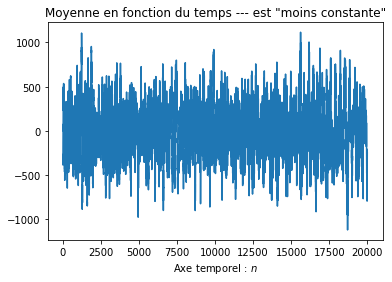

<Figure size 432x288 with 0 Axes>

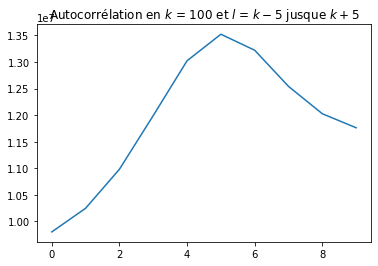

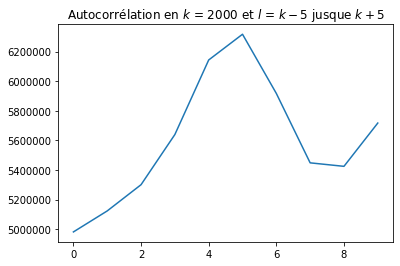

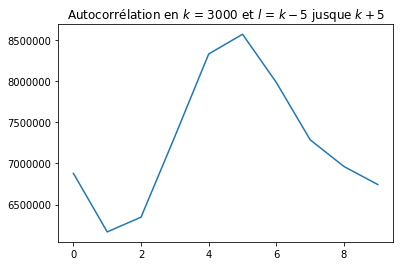

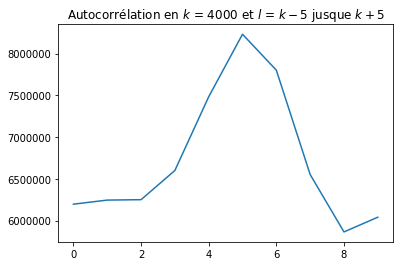

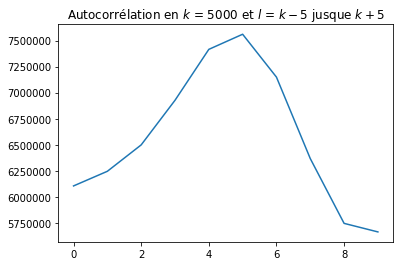

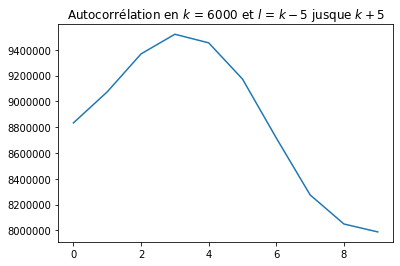

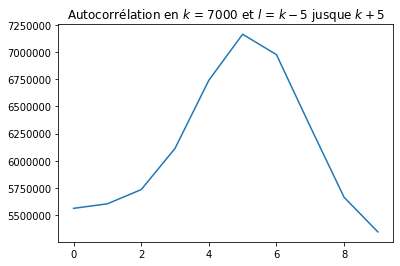

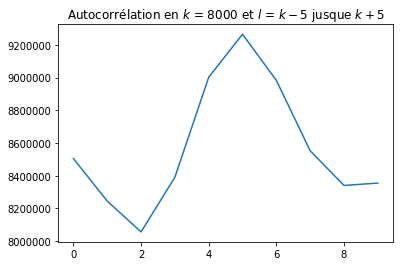

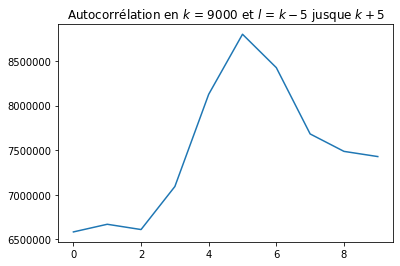

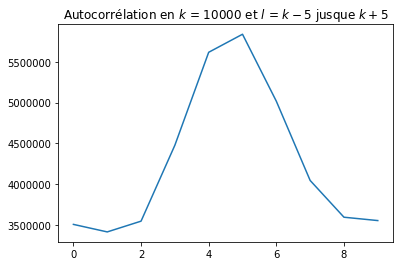

Pour le signal du son, on constate que la fonction d'autocorr√©lation est diff√©rente, en fonction $k$ (et donc ne d√©pend pas que de $k-l$)


In [4]:
fs, data = wavfile.read('./son.wav')

Tableauson=np.zeros((Real,N))
for i in np.arange(Real):
    Tableauson[i]=data[i*N:(i+1)*N]


mX=meanX(Tableauson)
Rx=corrX(Tableauson,ki,tau)

plt.plot(mX)
plt.title('Moyenne en fonction du temps --- est "moins constante"')
plt.xlabel('Axe temporel : $n$')


plt.figure()
for i in np.arange(10):
    plt.figure()
    plt.plot(Rx[i])
    titre = 'Autocorr√©lation en $k$ = ' + str(ki[i]) + ' et $l$ = $k-5$ jusque $k+5$'
    plt.title(titre)
plt.show()

msg = 'Pour le signal du son, on constate que la fonction d\'autocorr√©lation est diff√©rente, en fonction $k$ (et donc ne d√©pend pas que de $k-l$)'

print(msg)


### Stationarisation d'un signal sinuso√Ødal


Dans un premier temps, vous allez g√©n√©rer un tableau de 100 sinuso√Ødes de dur√©e 10 $T$, o√π $T$ est la dur√©e d'une p√©riode (√† vous de choisir la "fr√©quence d'√©chantillonage") et d'amplitude al√©atoire de distribution uniforme sur [0,1].

Faites le calcul de  $m_X[n]$ et  $R_X[k,l]$ pour $l - k$ compris entre -$T$ et $T$.

Qu'en d√©duisez vous sur la stationnarit√© de ces sinuso√Ødes.

Dans un deuxi√®me temps, vous allez g√©n√©rer un tableau de 100 sinuso√Ødes de dur√©e 10 $T$, d'amplitude al√©atoire de distribution uniforme sur [0,1] et de phase al√©atoire de distribution uniforme sur $[0 ,2 \pi]$.


Faites le calcul de  $m_X[n]$ et  $R_X[k,l]$ pour $l - k$ compris entre -$T$ et $T$.

Qu'en d√©duisez vous sur la stationnarit√© de ces sinuso√Ødes.




<IPython.core.display.Javascript object>


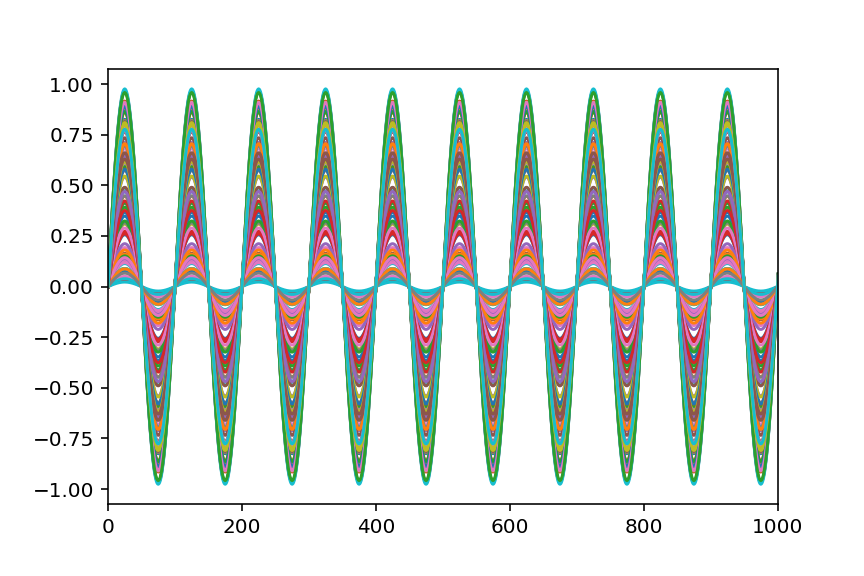

<IPython.core.display.Javascript object>


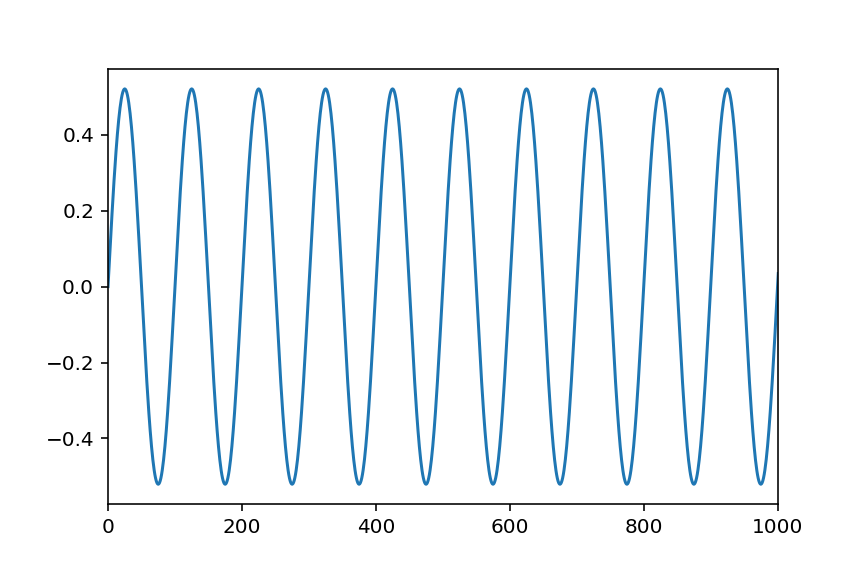

In [6]:
%matplotlib notebook
T=100
N=10*T
f=1/100
n=np.arange(0,N)
Real=100
# vos sinuso√Ødes √† amplitude al√©atoire ici
fe=20              #fr√©quence d'√©chantillonnage

x = np.linspace(0, 2*np.pi*f*fe*N, 20*10*T)
plt.xlim(0,1000)
for i in range(0, Real):
    Tableau[i]=np.random.uniform(0,1)*np.sin(x)


plt.plot(Tableau.T)
plt.show()

plt.figure()
plt.xlim(0,1000)
plt.plot(meanX(Tableau))
plt.show()

<IPython.core.display.Javascript object>


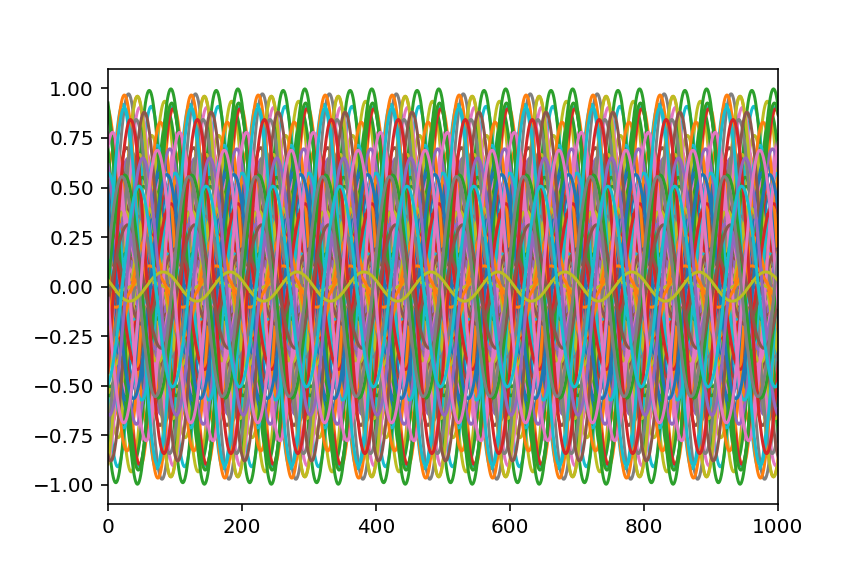

<IPython.core.display.Javascript object>


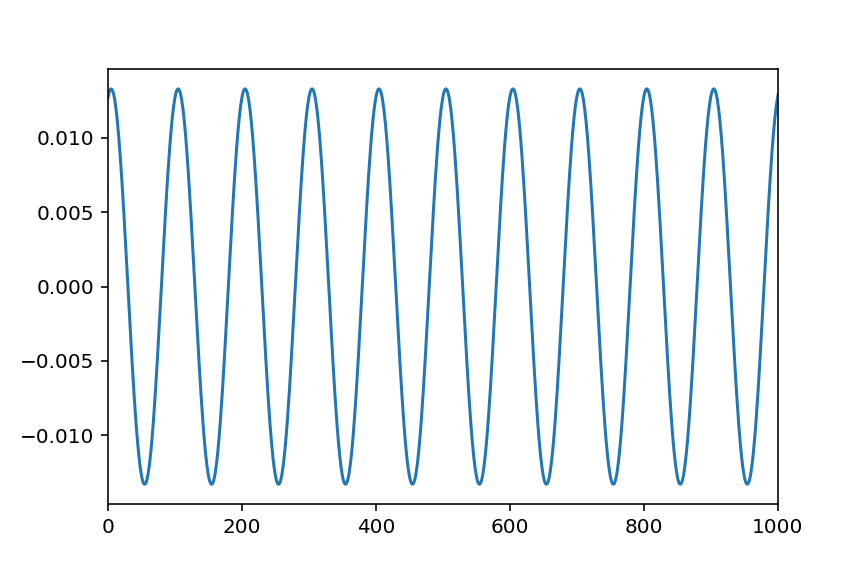

<IPython.core.display.Javascript object>


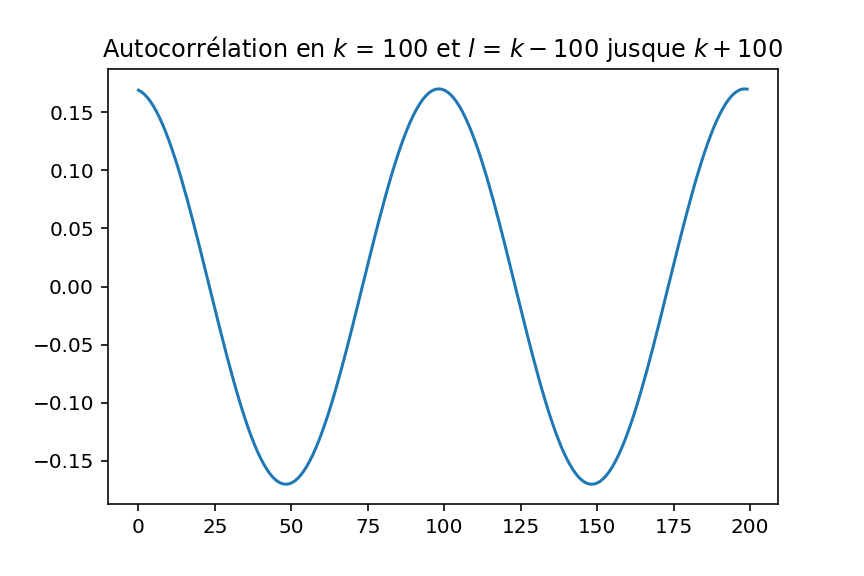

<IPython.core.display.Javascript object>


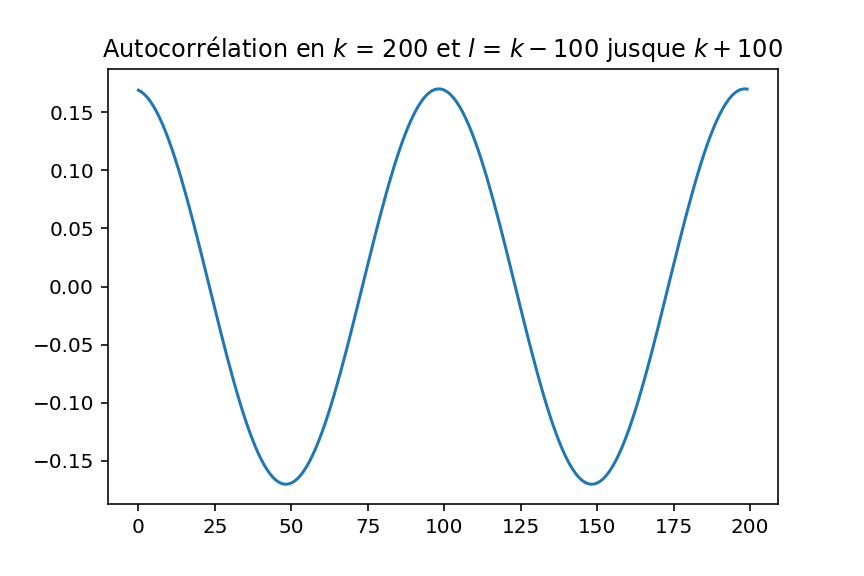

<IPython.core.display.Javascript object>


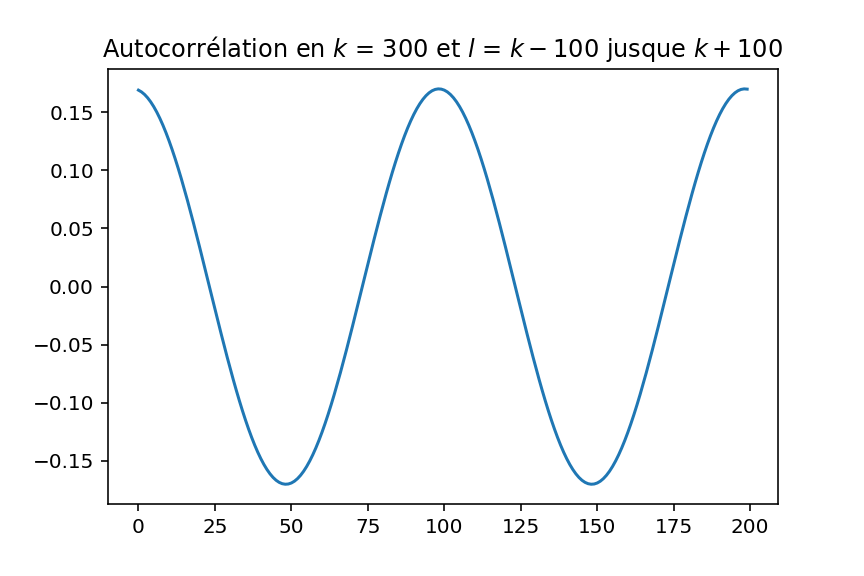

<IPython.core.display.Javascript object>


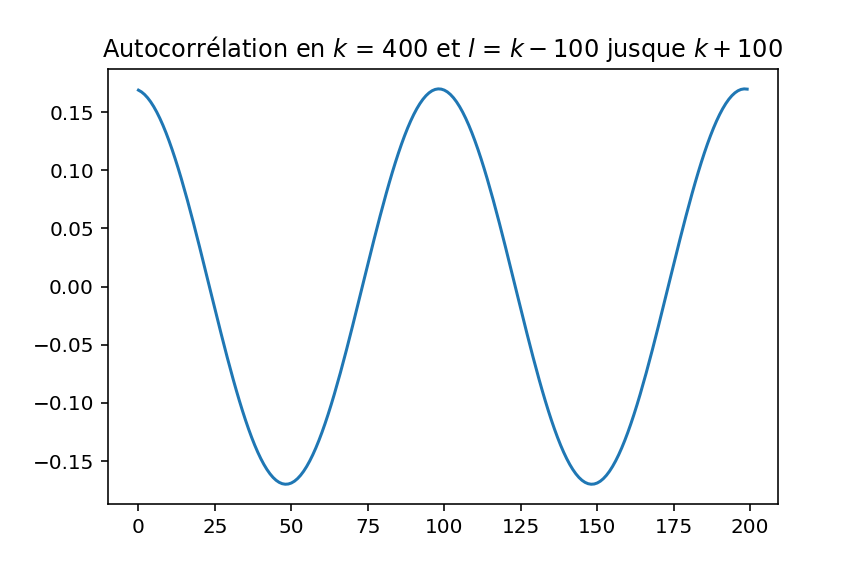

<IPython.core.display.Javascript object>


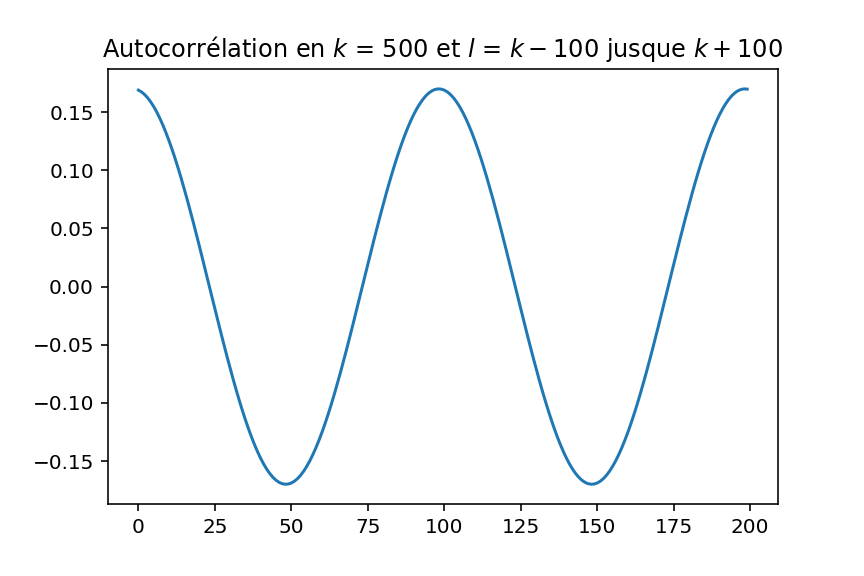

<IPython.core.display.Javascript object>


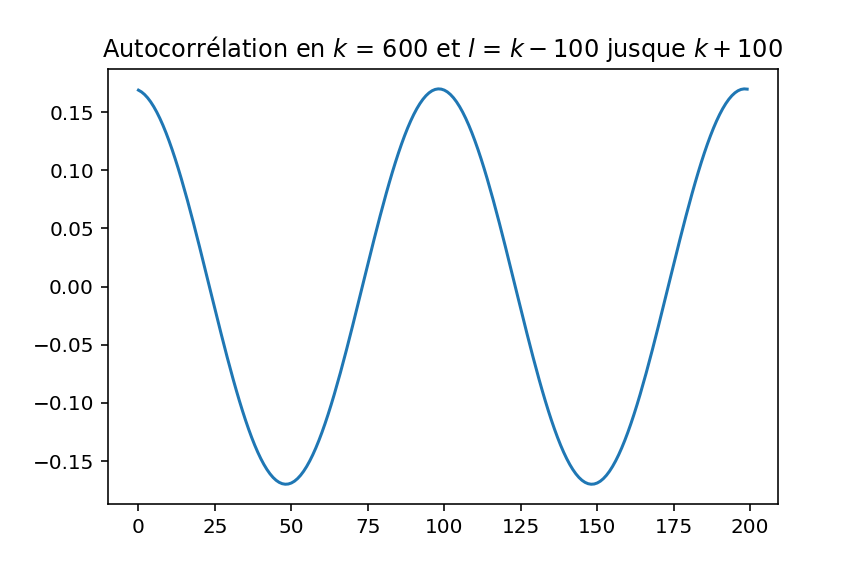

<IPython.core.display.Javascript object>


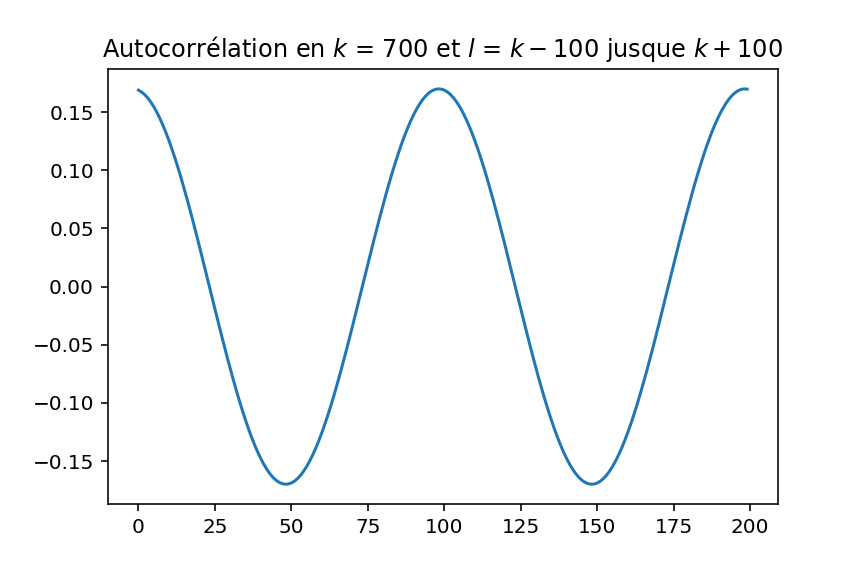

<IPython.core.display.Javascript object>


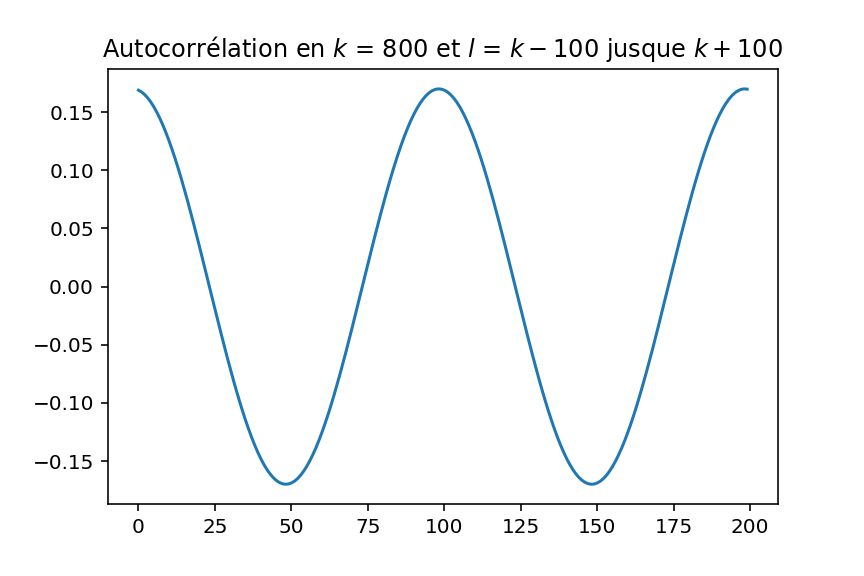

In [7]:
%matplotlib notebook
T=100
N=10*T
f=1/100
n=np.arange(0,N)
Real=100
# vos sinuso√Ødes √† amplitude et phase al√©atoires ici
fe=20              #fr√©quence d'√©chantillonnage

x = np.linspace(0, 2*np.pi*f*fe*N, 20*10*T)
for i in range(0, Real):
    Tableau[i]=np.random.uniform(0,1)*np.sin(x+np.random.uniform(0,2*np.pi))
    
plt.xlim(0, 1000)
plt.plot(Tableau.T)
plt.show()

plt.figure()
plt.xlim(0,1000)
plt.plot(meanX(Tableau))
plt.show()

ki=np.array([100,200,300,400,500,600,700,800])
tau=np.arange(-100,100)
Rx=corrX(Tableau,ki,tau)

for i in np.arange(ki.size):
    plt.figure()
    plt.plot(Rx[i])
    titre = 'Autocorr√©lation en $k$ = ' + str(ki[i]) + ' et $l$ = $k-100$ jusque $k+100$'
    plt.title(titre)
plt.show()


<font color='blue'>
y(x)=sin(x) n'est pas un processus al√©atoire, car il n'y a rien d'al√©atoire. 
    Il faut ajouter une amplitude al√©atoire pour obtenir un processus al√©atoire: y(x) = Asin(x).
 y(x) = Asin‚Å°(x) Il s'agit d'un processus al√©atoire car ùê¥ est une variable al√©atoire. Cependant, y(x) n'est pas stationnaire, mais il est cyclostationnaire, c'est-√†-dire que ses propri√©t√©s statistiques varient p√©riodiquement.     


    
On peux faire x(t) stationnaire en ajoutant une phase al√©atoire: y(x) = Asin‚Å° (x + œï)

La phase ùúô‚àà [0,2ùúã]est une variable al√©atoire uniform√©ment distribu√©e ind√©pendante de ùê¥.
Les propri√©t√©s statistiques de y(x) sont ind√©pendants de x, et donc, le processus est stationnaire.
</font>

### Densit√© spectrale de puissance

Soit $X[n]$ un signal stationnaire et ergodique, un rapide retour au cours nous indique que la densit√© spectrale de puissance est √©gale √† la transform√©e de Fourier de la fonction d'autocorr√©lation.

Dans ce cas, le signal √©tant ergodique, vous pouvez remplacer la fonction d'autocorr√©lation d'ensemble ($\mbox{E}[X[l] X[k]]$), par la fonction d'autocorr√©lation obtenue par moyennage temporel sur une seule r√©alisation du processus al√©atoire 
$$r_X[l-k] = \mbox{E}[X[l] X[k]]= \lim_{N\rightarrow \infty} \frac{1}{2N+1}\sum_{n=-N}^{N} x[n]x[n-(l-k)]$$.

Utilisez le signal sinuso√Ødal obtenu ci-dessus et v√©rifiez cette relation.  Quels sont les deux avantage principaux d√©coulant de  l'utilisation de la propri√©t√© d'ergodicit√© ?

<IPython.core.display.Javascript object>


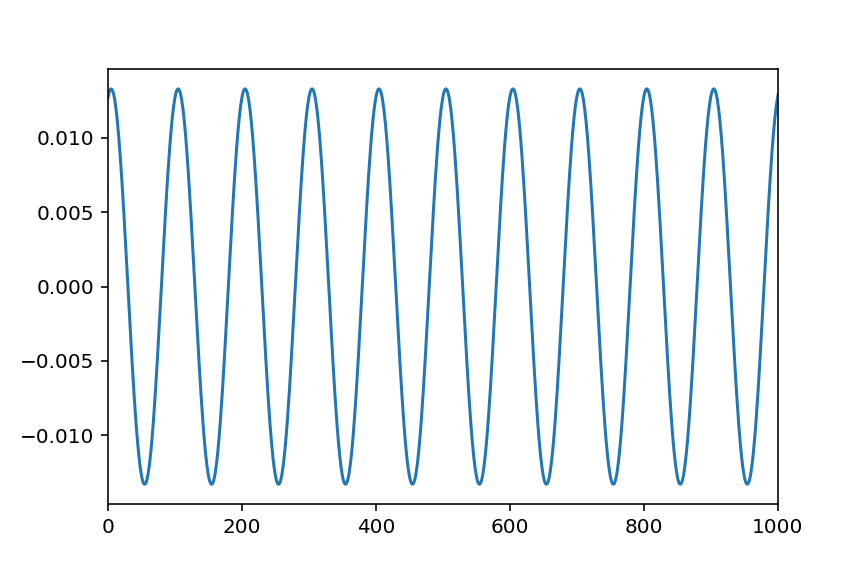

<IPython.core.display.Javascript object>


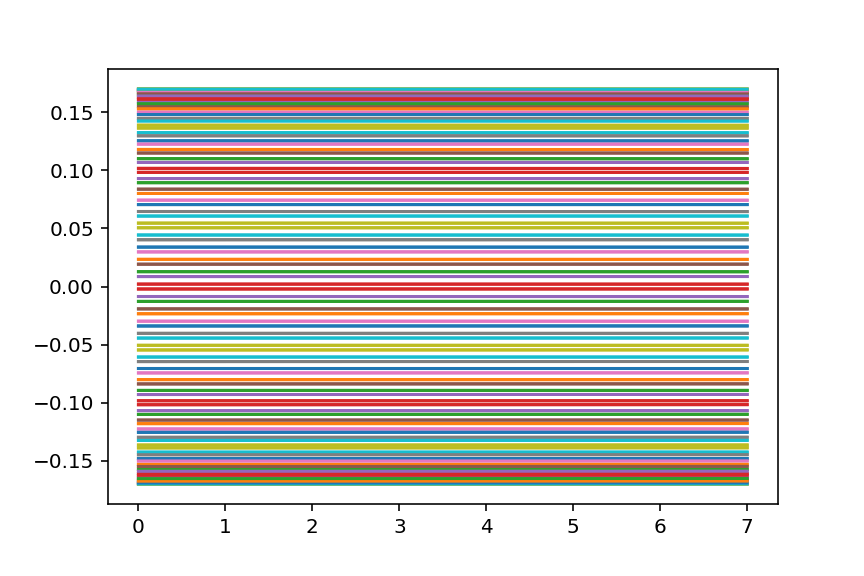

In [10]:
plt.figure()
plt.xlim(0,1000)
plt.plot(meanX(Tableau))
plt.show()

plt.figure()
plt.plot(corrX(Tableau, ki, tau))
plt.show()


<font color='blue'>Un processus stationnaire au sens large X(t) a une moyenne constante et une autocovariance qui ne d√©pend que du retard $\tau$ et pas √† le temps.
Lorsque le processus passe √† l'infini, la variance passe √† z√©ro.</font>